<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Decision_Trees_for_fraud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".**

In [1]:
from google.colab import files
upload=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check.csv")
df


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df1= ['Risky' if x <= 30000 else 'Good' for x in df['Taxable.Income']]

In [4]:
df.drop('Taxable.Income', axis=1, inplace=True)


In [5]:
df['taxable_income'] = df1
print(df)

    Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0          NO         Single            50047               10   YES   
1         YES       Divorced           134075               18   YES   
2          NO        Married           160205               30   YES   
3         YES         Single           193264               15   YES   
4          NO        Married            27533               28    NO   
..        ...            ...              ...              ...   ...   
595       YES       Divorced            39492                7   YES   
596       YES       Divorced            55369                2   YES   
597        NO       Divorced           154058                0   YES   
598       YES        Married           180083               17    NO   
599        NO       Divorced           158137               16    NO   

    taxable_income  
0             Good  
1             Good  
2             Good  
3             Good  
4             Good  
..       

In [6]:
Y = df["taxable_income"]
X = df.iloc[:,0:5]
list(X)

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [7]:
import pandas as pd
import numpy as np
df.shape
df.info()
pd.set_option('display.max_columns', None)
df
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   taxable_income   600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
taxable_income     0
dtype: int64

In [8]:
list(df)

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'taxable_income']

In [9]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


array([[<Axes: title={'center': 'City.Population'}>,
        <Axes: title={'center': 'Work.Experience'}>]], dtype=object)

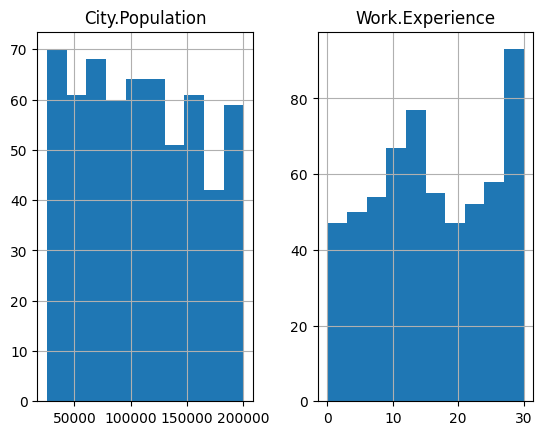

In [10]:
df.hist()

In [11]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
X["Undergrad"]=LE.fit_transform(X["Undergrad"])
X["Marital.Status"]=LE.fit_transform(X["Marital.Status"])
X["Urban"]=LE.fit_transform(X["Urban"])

In [13]:
X


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',max_depth=6)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

DT.tree_.max_depth
DT.tree_.node_count

43

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions
predictions = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 1.0


In [17]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy", ac1.round(3))
print("Test Accuracy", ac2.round(3))

Training Accuracy 0.822
Test Accuracy 0.76


In [18]:
from sklearn.model_selection import train_test_split

# Correct way of splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
#hyper Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use GridSearchCV to perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy:  0.9666666666666668


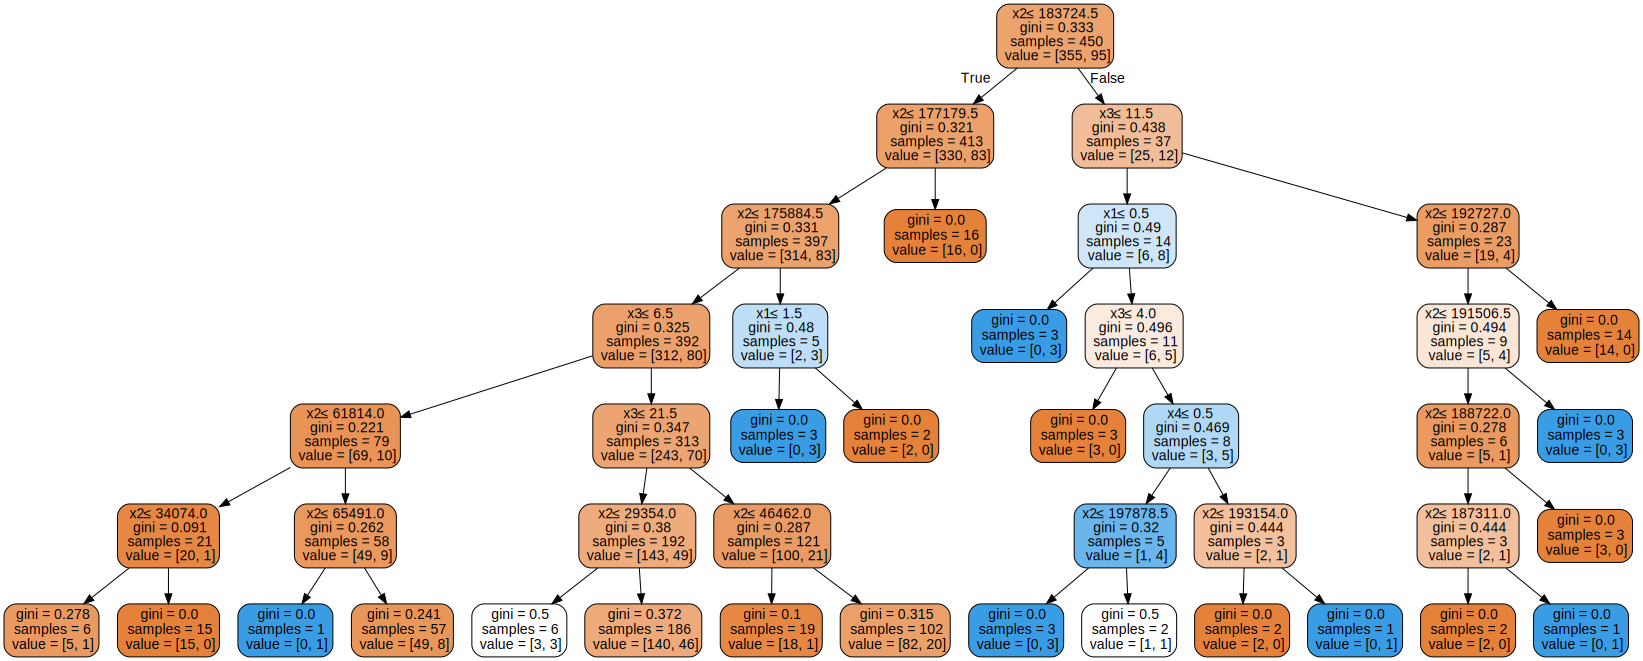

In [31]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled=True, rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph